In [5]:
import pandas as pd
import pandana as pdna
import time

import urbanaccess as ua
from urbanaccess.config import settings
from urbanaccess.gtfsfeeds import feeds
from urbanaccess import gtfsfeeds
from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
from urbanaccess.network import ua_network, load_network


In [6]:
# Pandana currently uses depreciated parameters in matplotlib, this hides the warning until its fixed
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
# Add GTFS feeds from berlin
feeds.to_dict()
feeds.add_feed(add_dict={'vbb': 'https://www.vbb.de/media/download/2029'})
gtfsfeeds.download()

Added 1 feeds to gtfs_feeds: {'vbb': 'https://www.vbb.de/media/download/2029'}
1 GTFS feeds will be downloaded here: data/gtfsfeed_zips
vbb GTFS feed downloaded successfully. Took 24.06 seconds for 68,610,050.0KB
GTFS feed download completed. Took 24.06 seconds
vbb.zip successfully extracted to: data/gtfsfeed_text/vbb
GTFS feed zipfile extraction completed. Took 4.03 seconds for 1 files


In [4]:
# load feeds
bbox = (13.08835, 52.33826, 13.76116, 52.67551)
bbox_mitte = (13.296857,52.472924,13.462687,52.570473)


validation = True
verbose = True
remove_stops_outsidebbox = True
append_definitions = True


loaded_feeds = ua.gtfs.load.gtfsfeed_to_df(gtfsfeed_path=None,
                                           validation=validation,
                                           verbose=verbose,
                                           bbox=bbox_mitte,
                                           remove_stops_outsidebbox=remove_stops_outsidebbox,
                                           append_definitions=append_definitions)

GTFS text file header whitespace check completed. Took 4.95 seconds
--------------------------------
Processing GTFS feed: vbb
GTFS feed: vbb, calendar_dates uses the same service_id across multiple agency_ids. This feed calendar_dates table will be modified from its original format to provide service_ids for each agency using a one to many join
GTFS feed: vbb, calendar uses the same service_id across multiple agency_ids. This feed calendar table will be modified from its original format to provide service_ids for each agency using a one to many join
GTFS feed: vbb, stops uses the same stop_id across multiple agency_ids. This feed stops table will be modified from its original format to provide stop_ids for each agency using a one to many join
agency.txt agency_name column has more than one agency name listed. Unique agency id was assigned using the agency id and associated agency name.
Unique agency id operation complete. Took 124.36 seconds
Unique GTFS feed id operation complete. Too

In [5]:
ua.gtfs.network.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='monday',
                                   timerange=['07:00:00', '10:00:00'],
                                   calendar_dates_lookup=None)

Using calendar to extract service_ids to select trips.
901 service_ids were extracted from calendar
61,942 trip(s) 26.11 percent of 237,198 total trip records were found in calendar for GTFS feed(s): ['vbb']
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify service_ids. When in doubt do not use the calendar_dates_lookup parameter.
61,942 of 237,198 total trips were extracted representing calendar day: monday. Took 0.60 seconds
There are no departure time records missing from trips following monday schedule. There are no records to interpolate.
Difference between stop times has been successfully calculated. Took 9.16 seconds
Stop times from 07:00:00 to 10:00:00 successfully selecte

In [6]:
urbanaccess_net = ua.network.ua_network


In [7]:
nodes, edges = ua.osm.load.ua_network_from_bbox(bbox=bbox_mitte,
                                                remove_lcn=True)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](52.47292400,13.29685700,52.57047300,13.46268700);>;);out;'}"
Downloaded 26,799.7KB from www.overpass-api.de in 11.84 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 13.13 seconds
Returning OSM data with 147,566 nodes and 49,937 ways...
Edge node pairs completed. Took 162.30 seconds
Returning processed graph with 61,678 nodes and 170,108 edges...
Completed OSM data download and Pandana node and edge table creation in 184.96 seconds
checking for low connectivity nodes...
302 out of 61,678 nodes (0.49 percent of total) were identified as having low connectivity and have been removed.
Completed OSM data download and graph node and edge table cre

In [8]:
ua.osm.network.create_osm_net(osm_edges=edges,
                              osm_nodes=nodes,
                              travel_speed_mph=3)

Created OSM network with travel time impedance using a travel speed of 3 MPH. Took 0.03 seconds


In [9]:
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=False)

Loaded UrbanAccess network components comprised of:
     Transit: 1,889 nodes and 51,848 edges;
     OSM: 61,376 nodes and 169,470 edges
Connector edges between the OSM and transit network nodes successfully completed. Took 1.44 seconds
Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 6.36 seconds
Network edge and node network integration completed successfully resulting in a total of 63,265 nodes and 225,096 edges:
     Transit: 1,889 nodes 51,848 edges;
     OSM: 61,376 nodes 169,470 edges; and
     OSM/Transit connector: 3,778 edges.


In [10]:
urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit'].head()


access area bridge  distance est_width  \
0    nan  nan    nan       NaN       nan   
1    nan  nan    nan       NaN       nan   
2    nan  nan    nan       NaN       nan   
3    nan  nan    nan       NaN       nan   
4    nan  nan    nan       NaN       nan   

                                           from  hgv highway  \
0  710009020201_odeg_ostdeutsche_eisenbahn_gmbh  nan     nan   
1  710009003200_odeg_ostdeutsche_eisenbahn_gmbh  nan     nan   
2  710009100020_odeg_ostdeutsche_eisenbahn_gmbh  nan     nan   
3  710009003200_odeg_ostdeutsche_eisenbahn_gmbh  nan     nan   
4  710009100020_odeg_ostdeutsche_eisenbahn_gmbh  nan     nan   

                                       edge_id junction  ... service  \
0  101232852_odeg_ostdeutsche_eisenbahn_gmbh_1      nan  ...     nan   
1  101232852_odeg_ostdeutsche_eisenbahn_gmbh_2      nan  ...     nan   
2  101232852_odeg_ostdeutsche_eisenbahn_gmbh_3      nan  ...     nan   
3  101232864_odeg_ostdeutsche_eisenbahn_gmbh_1      nan  ...     nan   
4  101232864_odeg_ostdeutsche_eisenbahn_gmbh_2      nan  ...     nan   

                                             to tunnel  \
0  710009003200_odeg_ostdeutsche_eisenbahn_gmbh    nan   
1  710009100020_odeg_ostdeutsche_eisenbahn_gmbh    nan   
2  710009058101_odeg_ostdeutsche_eisenbahn_gmbh    nan   
3  710009100020_odeg_ostdeutsche_eisenbahn_gmbh    nan   
4  710009058101_odeg_ostdeutsche_eisenbahn_gmbh    nan   

                  unique_agency_id                            unique_route_id  \
0  odeg_ostdeutsche_eisenbahn_gmbh  16835_100_odeg_ostdeutsche_eisenbahn_gmbh   
1  odeg_ostdeutsche_eisenbahn_gmbh  16835_100_odeg_ostdeutsche_eisenbahn_gmbh   
2  odeg_ostdeutsche_eisenbahn_gmbh  16835_100_odeg_ostdeutsche_eisenbahn_gmbh   
3  odeg_ostdeutsche_eisenbahn_gmbh  16835_100_odeg_ostdeutsche_eisenbahn_gmbh   
4  odeg_ostdeutsche_eisenbahn_gmbh  16835_100_odeg_ostdeutsche_eisenbahn_gmbh   

                              unique_trip_id  weight  width from_int to_int  
0  101232852_odeg_ostdeutsche_eisenbahn_gmbh     9.0    nan      114    108  
1  101232852_odeg_ostdeutsche_eisenbahn_gmbh     3.4    nan      108    110  
2  101232852_odeg_ostdeutsche_eisenbahn_gmbh     5.7    nan      110    109  
3  101232864_odeg_ostdeutsche_eisenbahn_gmbh     3.4    nan      108    110  
4  101232864_odeg_ostdeutsche_eisenbahn_gmbh     5.7    nan      110    109  

[5 rows x 28 columns]

In [11]:
ua.network.save_network(urbanaccess_network=urbanaccess_net,
                        filename='final_mitte.h5',
                        overwrite_key=True)

New final_mitte.h5 hdf5 store created in dir: data
edges saved in data/final_mitte.h5 hdf5 store.
Using existing data/final_mitte.h5 hdf5 store.
nodes saved in data/final_mitte.h5 hdf5 store.


In [12]:
# load network
# filepath to network
urbanaccess_net = ua.network.load_network(filename='final_mitte.h5')

Successfully read store: data/final_mitte.h5 with the following keys: ['/edges', '/nodes']
Successfully read store: data/final_mitte.h5 with the following keys: ['/edges', '/nodes']


Figure created. Took 64.16 seconds


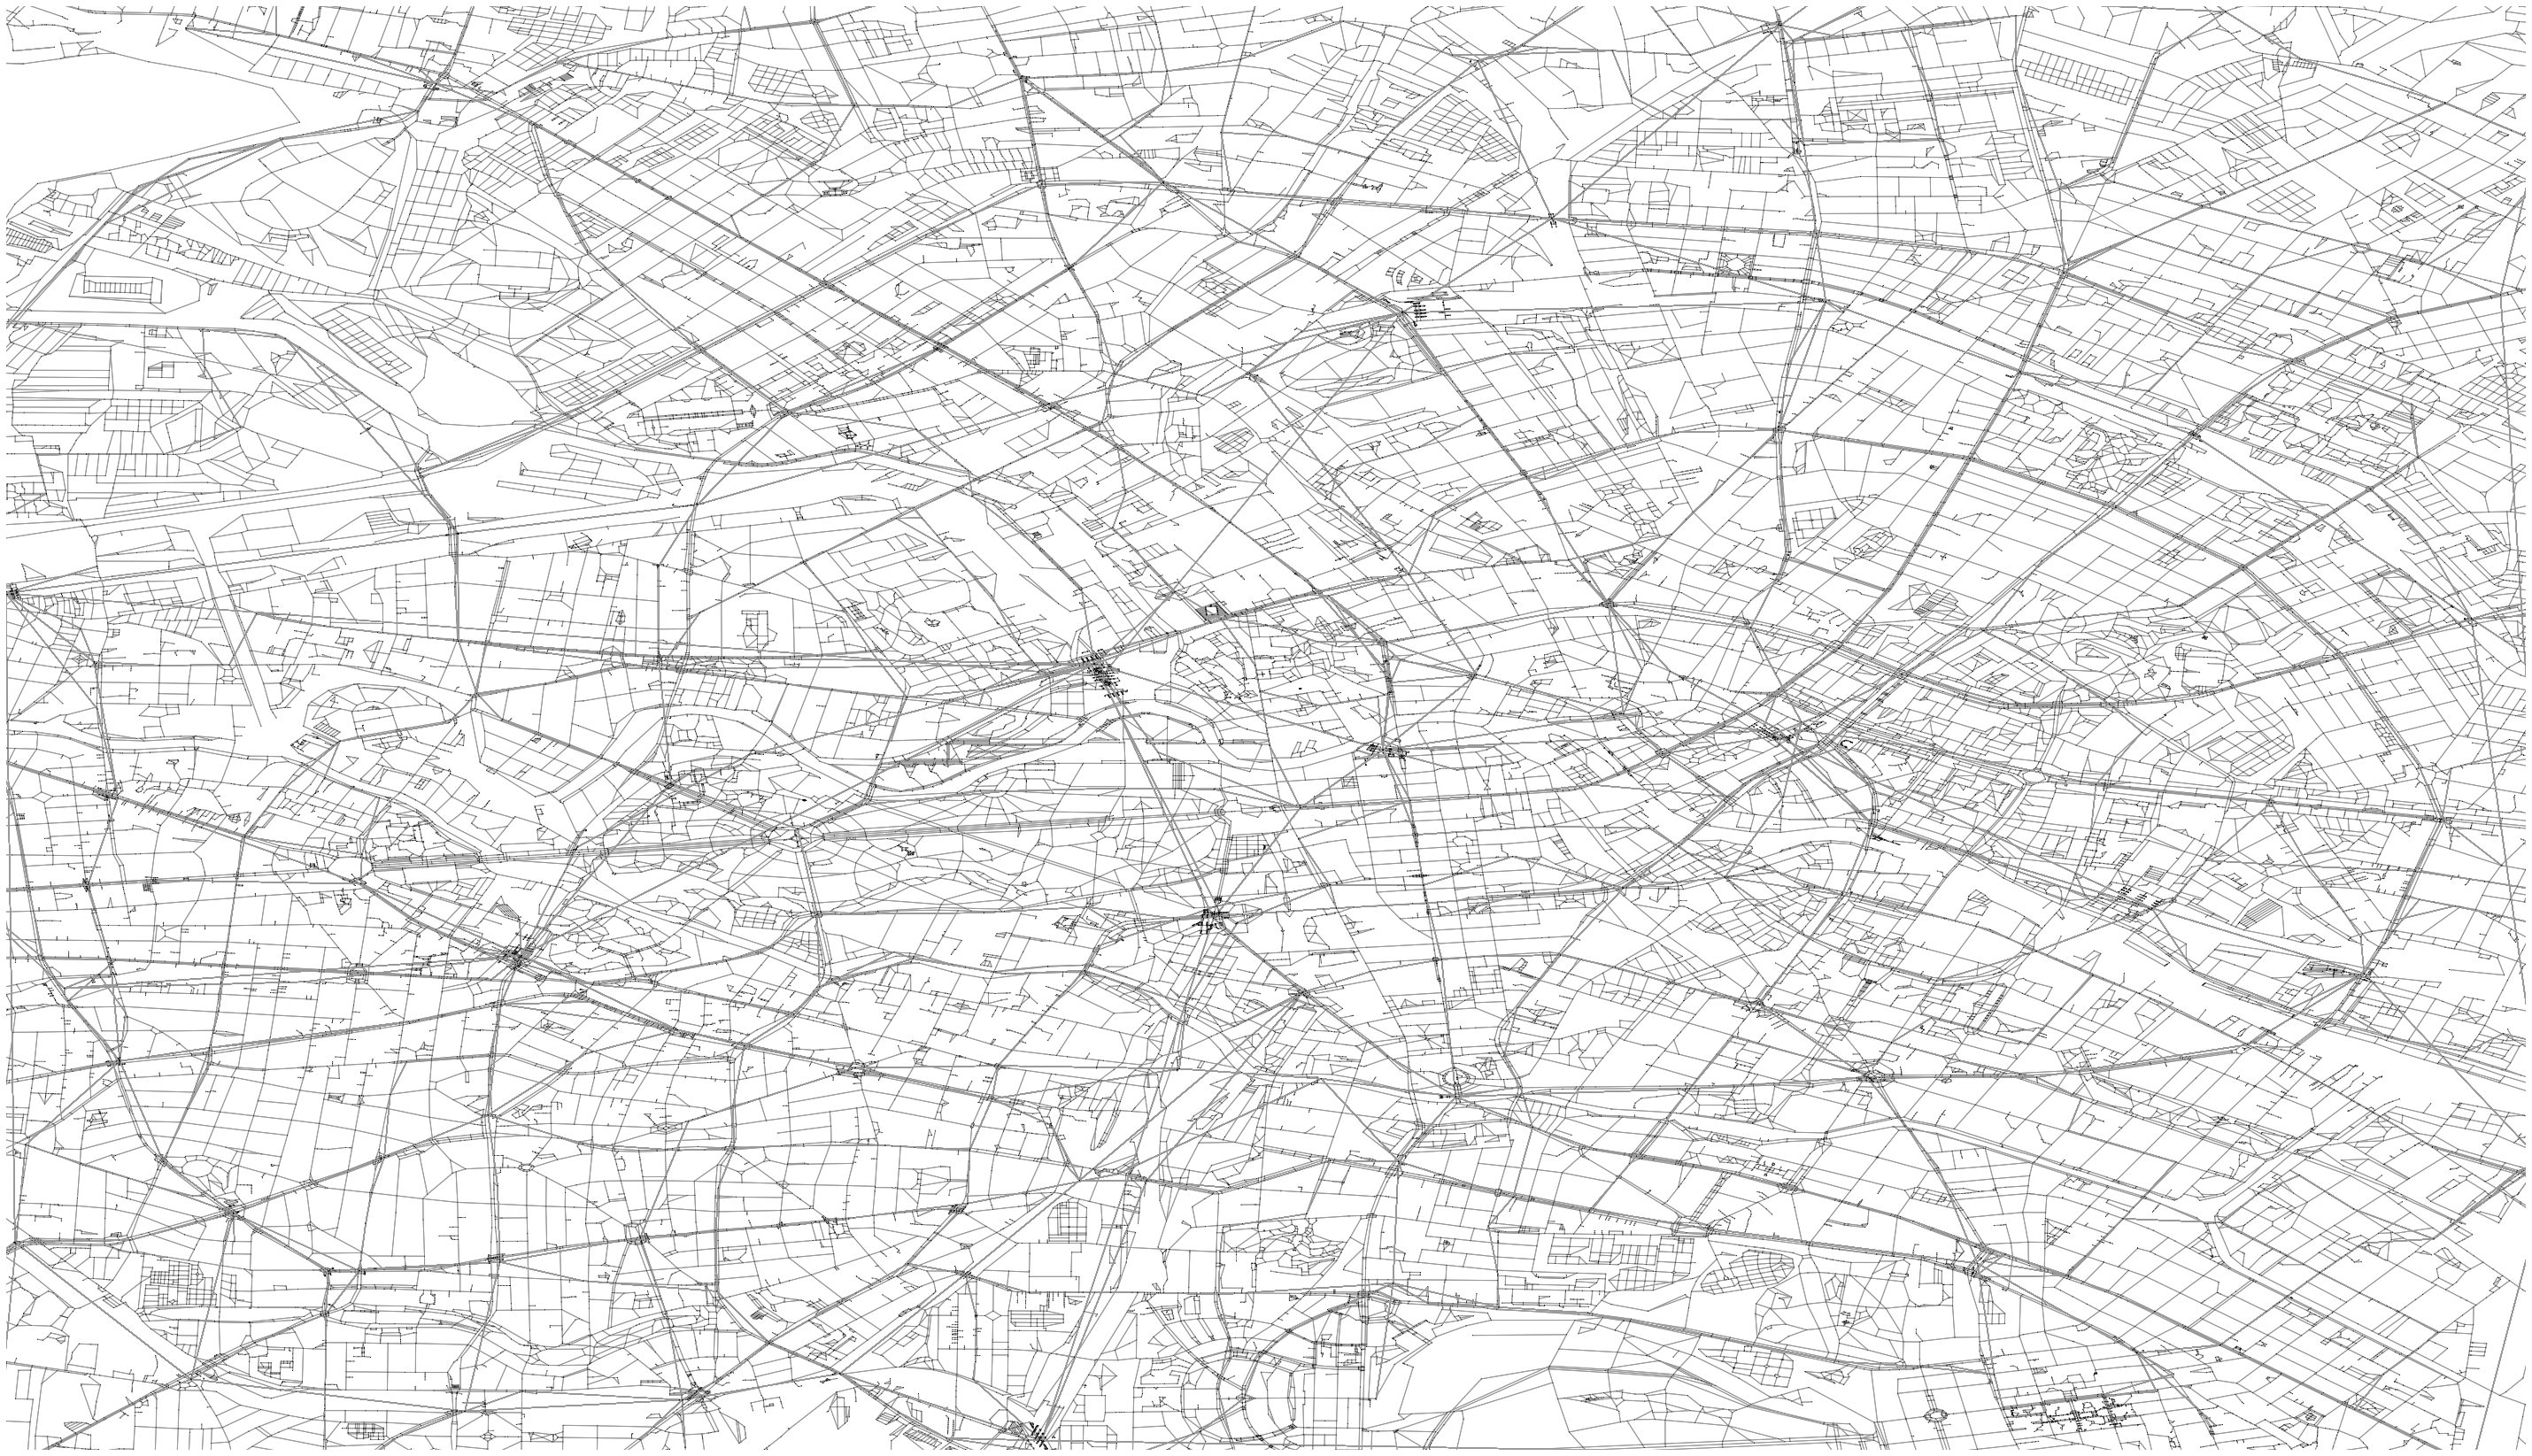

(<Figure size 3671.93x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ab9b54090>)

In [14]:
# Plot Network
%matplotlib inline
bbox = (13.08835, 52.33826, 13.76116, 52.67551)

ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges,
                 bbox=bbox_mitte,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=1.1, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [15]:
ua.gtfs.headways.headways(gtfsfeeds_df=loaded_feeds,
                          headway_timerange=['07:00:00','10:00:00'])

Stop times from 07:00:00 to 10:00:00 successfully selected 56,240 records out of 337,504 total records (16.66 percent of total). Took 0.02 seconds
Starting route stop headway calculation for 3,042 route stops...
Route stop headway calculation complete. Took 12.41 seconds
headway calculation complete. Took 14.38 seconds


In [16]:
loaded_feeds.headways.head()

count  mean        std  min  25%  50%   75%   max  \
56041    5.0  24.6  29.577018  3.0  3.0  3.0  57.0  57.0   
56047    5.0  24.6  29.577018  3.0  3.0  3.0  57.0  57.0   
56053    5.0  24.6  29.577018  3.0  3.0  3.0  57.0  57.0   
56064    5.0  24.6  29.577018  3.0  3.0  3.0  57.0  57.0   
56070    5.0  24.6  29.577018  3.0  3.0  3.0  57.0  57.0   

                 unique_stop_id        unique_route_id  \
56041  000008010255_db_regio_ag  19040_100_db_regio_ag   
56047  000008010255_db_regio_ag  19040_100_db_regio_ag   
56053  000008010255_db_regio_ag  19040_100_db_regio_ag   
56064  000008010255_db_regio_ag  19040_100_db_regio_ag   
56070  000008010255_db_regio_ag  19040_100_db_regio_ag   

                                        node_id_route  
56041  000008010255_db_regio_ag_19040_100_db_regio_ag  
56047  000008010255_db_regio_ag_19040_100_db_regio_ag  
56053  000008010255_db_regio_ag_19040_100_db_regio_ag  
56064  000008010255_db_regio_ag_19040_100_db_regio_ag  
56070  000008010255_db_regio_ag_19040_100_db_regio_ag

In [17]:
# Add Headway-Times
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=True,
                             urbanaccess_gtfsfeeds_df=loaded_feeds,
                             headway_statistic='mean')

Loaded UrbanAccess network components comprised of:
     Transit: 1,889 nodes and 51,848 edges;
     OSM: 61,376 nodes and 169,470 edges
routes successfully joined to transit nodes. Took 0.19 seconds
Connector edges between the OSM and transit network nodes successfully completed. Took 1.75 seconds
mean route stop headway will be used for pedestrian to transit edge impedance.
Headway impedance calculation completed. Took 0.10 seconds
Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 6.65 seconds
Network edge and node network integration completed successfully resulting in a total of 64,402 nodes and 280,431 edges:
     Transit: 3,026 nodes 51,848 edges;
     OSM: 61,376 nodes 169,470 edges; and
     OSM/Transit connector: 59,113 edges.


In [18]:
# Safe Network
ua.network.save_network(urbanaccess_network=urbanaccess_net,
                        filename='final_mitte.h5',
                        overwrite_key=True)

Using existing data/final_mitte.h5 hdf5 store.
Existing edges overwritten in data/final_mitte.h5 hdf5 store.
Using existing data/final_mitte.h5 hdf5 store.
Existing nodes overwritten in data/final_mitte.h5 hdf5 store.


In [21]:
# load network
ua_net = ua.network.load_network(filename='final_mitte.h5')


Successfully read store: data/final_mitte.h5 with the following keys: ['/edges', '/nodes']
Successfully read store: data/final_mitte.h5 with the following keys: ['/edges', '/nodes']


In [22]:
# Import Listings
Listings_dir = r'/Users/Julian/Desktop/UniMaster/3.Semester/FossGiss_Proj/Berlin_Data/Listings_Mitte.csv'
df_listings = pd.read_csv(Listings_dir)

# Import POIS
amanaties_dir = r'/Users/Julian/Desktop/UniMaster/3.Semester/FossGiss_Proj/Berlin_Data/Amanaties_Mitte.csv'
df_amanaties = pd.read_csv(amanaties_dir)

# Separate Coordinates from coordinate column into Long and Lat
df_amanaties[['longitude','latitude']] = df_amanaties.coordinates.str.split(",",expand=True,)

    

In [23]:
# Initialise Pandana Network
s_time = time.time()
transit_ped_net = pdna.Network(ua_net.net_nodes["x"],
                               ua_net.net_nodes["y"],
                               ua_net.net_edges["from_int"],
                               ua_net.net_edges["to_int"],
                               ua_net.net_edges[["weight"]], 
                               twoway=False)
print('Took {:,.2f} seconds'.format(time.time() - s_time))

Took 35.51 seconds


In [ ]:
# set pois
#transit_ped_net.precompute(30)

distance = 20
num_pois = 10

# hier kann man vllt auch die OSM-Rohdaten importieren
transit_ped_net.set_pois('amanaties', distance ,num_pois, df_amanaties['longitude'], df_amanaties['latitude'])

In [25]:
# get Node IDS
long = df_listings['longitude']
lat = df_listings['latitude']
df_listings['node_id'] = transit_ped_net.get_node_ids(long, lat)

In [26]:
all_access = transit_ped_net.nearest_pois(distance=distance, category='amanaties', num_pois=num_pois)
print('{:,} nodes'.format(len(all_access)))


64,402 nodes


In [27]:
num_pois = 5
N_nearest_access = transit_ped_net.nearest_pois(distance=distance, category='amanaties', num_pois=num_pois)

# Create DF for requested number of POIs
Access_Score = pd.DataFrame(N_nearest_access[5])

# Rename to score
Access = Access_Score.rename(columns={5:'Score'})

# get node_ids fpr POIs
df_amanaties['node_id'] = transit_ped_net.get_node_ids(df_amanaties['longitude'], df_amanaties['latitude'])





In [28]:
Access.reset_index(level=0, inplace=True)


In [29]:
print(Access)
Access = Access.rename(columns={'id_int':'node_id'})
print(listings['node_id'])

       node_id   Score
0            1  10.557
1            2   4.193
2            3   1.431
3            4   5.931
4            5   7.197
...        ...     ...
64397    64398  20.000
64398    64399  20.000
64399    64400  20.000
64400    64401  20.000
64401    64402  12.462

[64402 rows x 2 columns]
                latitude   longitude  altitude    geometry  \
0             52.5476798  13.3563426       NaN  MultiPoint   
1             52.5167625  13.3439365       NaN  MultiPoint   
2             52.5183945  13.3464153       NaN  MultiPoint   
3             52.5146541  13.3483549       NaN  MultiPoint   
4     52.541960799999984  13.3574263       NaN  MultiPoint   
...                  ...         ...       ...         ...   
1545          52.5265508  13.3416957       NaN  MultiPoint   
1546   52.52773049999998  13.3437572       NaN  MultiPoint   
1547          52.5281994  13.3439558       NaN  MultiPoint   
1548   52.54845049999999  13.3559418       NaN  MultiPoint   
1549   52.548801

In [30]:
merged = pd.merge(df_listings, Access, on='node_id')

In [31]:
print(merged)

      field_1        id   latitude  longitude  accommodates  bathrooms  \
0           0      2015  52.534537  13.402557             3        1.0   
1       15328  21169657  52.534631  13.402832             2        1.0   
2          14     22677  52.534348  13.405577             5        1.0   
3        1670   2195378  52.534872  13.405525             2        1.0   
4        1773   2394897  52.534398  13.406029             3        1.0   
...       ...       ...        ...        ...           ...        ...   
4274    22452  29773385  52.558134  13.342347             2        1.0   
4275    22470  29790270  52.515791  13.416402             2        1.0   
4276    22506  29816679  52.543273  13.358844             3        1.0   
4277    22521  29829280  52.536787  13.397349             2        1.0   
4278    22531  29848269  52.522064  13.418118             2        1.0   

      bedrooms  price  security_deposit  cleaning_fee  ...  \
0            1     60             200.0          

In [41]:
df_amanaties['test'] = 0.5
transit_ped_net.set(df_amanaties.node_id, variable=df_amanaties.test, name='tmp')

s = transit_ped_net.aggregate(20, type="count", decay="linear", name="tmp")
print(s)

id_int
1         367.0
2         919.0
3         669.0
4         328.0
5        1003.0
          ...  
64398       0.0
64399       0.0
64400       0.0
64401       0.0
64402      47.0
Length: 64402, dtype: float64


In [33]:
bbox_mitte = (13.296857,52.472924,13.462687,52.570473)

transit_ped_net.plot(s, bbox=bbox_mitte,
         fig_kwargs={'figsize': [20, 20]},
         bmap_kwargs={'suppress_ticks': False,
                      'resolution': 'h', 'epsg': '4326'},
         plot_kwargs={'cmap': 'BrBG', 's': 8, 'edgecolor': 'none'})

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [42]:
merged.to_csv('test.csv')